In [25]:
#Wind Speed in Lake Michigan near Chicago using Crib Data provided by Chicag Harbors

import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [26]:
url="https://www.glerl.noaa.gov/metdata/plot_3hr.php?site=chi&units=e#metdata"
html_content = requests.get(url)

In [27]:
# Parse the html content
soup = BeautifulSoup(html_content.content, "html.parser")

# print the parsed data of html
mydivs=soup.find_all("div",{"class":"small"})
mytable=mydivs[2]
mytable
#type(mytable)

<div class="small">
<pre>
                  Wind  Wind  Wind   Air   Dew   Rel
                   Spd   Gst   Dir  Temp    Pt   Hum
YYYY-MM-DD   CDT   kts   kts   deg     F     F     %
2022-08-06 14:06  16.1  18.5   127  81.5  74.6  79.2
2022-08-06 14:04  16.3  17.7   128  81.5  74.4  78.7
2022-08-06 14:02  16.3  17.1   127  81.7  74.1  77.5
2022-08-06 14:00  16.5  17.3   128  81.9  74.0  76.6
2022-08-06 13:58  17.3  18.3   125  81.7  73.6  76.1
2022-08-06 13:56  17.7  18.7   127  81.3  74.1  78.3
2022-08-06 13:54  17.5  18.5   127  81.3  74.4  79.1
2022-08-06 13:52  17.9  19.8   124  81.3  74.0  78.0
2022-08-06 13:50  17.1  17.9   127  81.1  74.4  79.6
2022-08-06 13:48  17.1  17.9   126  81.0  74.6  80.6
2022-08-06 13:46  17.5  19.1   128  81.0  74.6  80.8
2022-08-06 13:44  18.9  19.6   128  81.1  74.5  80.0
2022-08-06 13:42  18.5  19.4   130  81.1  74.5  80.0
2022-08-06 13:40  18.7  19.8   129  81.1  74.5  80.0
2022-08-06 13:38  17.5  18.9   127  81.0  74.9  81.5
2022-08-06 13:36  16

In [28]:
table = soup.find("pre").contents[0]

In [29]:
type(table)

bs4.element.NavigableString

In [30]:
data = str(table.string)

In [31]:
df = pd.DataFrame([x.split(';') for x in data.split('\n')[1:]], columns=[x for x in data.split('\n')[0].split(';')])
#print(df)
df1=df[3:]
df1.columns = ['raw']
df1=df1.raw.str.split(expand=True,)
df1.columns = ['Date','CDT','WindSpeed(kts)','WindGust(kts)','WindDir(ang)','AirTemp(F)','DewPoint(F)','RelHum(%)']
df1.drop(df1.tail(1).index,inplace=True) # drop last n rows
df1.reset_index(drop=True)

df1[["WindSpeed(kts)", "WindGust(kts)",'WindDir(ang)']] = df1[["WindSpeed(kts)", "WindGust(kts)",'WindDir(ang)']].apply(pd.to_numeric)

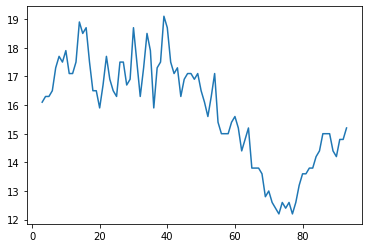

In [32]:
import matplotlib.pyplot as plt
plt.plot(df1['WindSpeed(kts)'])

In [33]:
df1["WindSpeed(kts)"]

3     16.1
4     16.3
5     16.3
6     16.5
7     17.3
      ... 
89    14.4
90    14.2
91    14.8
92    14.8
93    15.2
Name: WindSpeed(kts), Length: 91, dtype: float64

In [34]:
df1["WindSpeed(kts)"][3]

16.1